# **15차시: 회귀 모델과 성능 평가**
## 🔍 **학습목표**
- 회귀 문제를 해결하기 위한 **대표적인 모델(알고리즘)**을 이해하고 활용할 수 있다.
- 회귀 모델의 **성능을 평가하는 주요 지표**를 이해하고 계산할 수 있다.

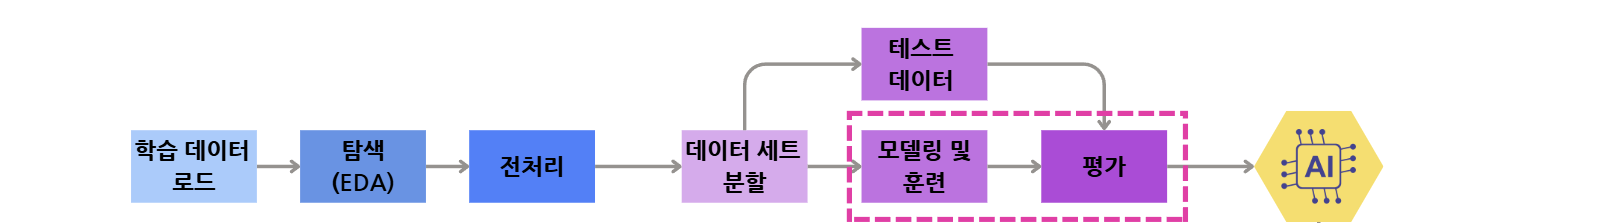


## **📌 대표적인 회귀 알고리즘**


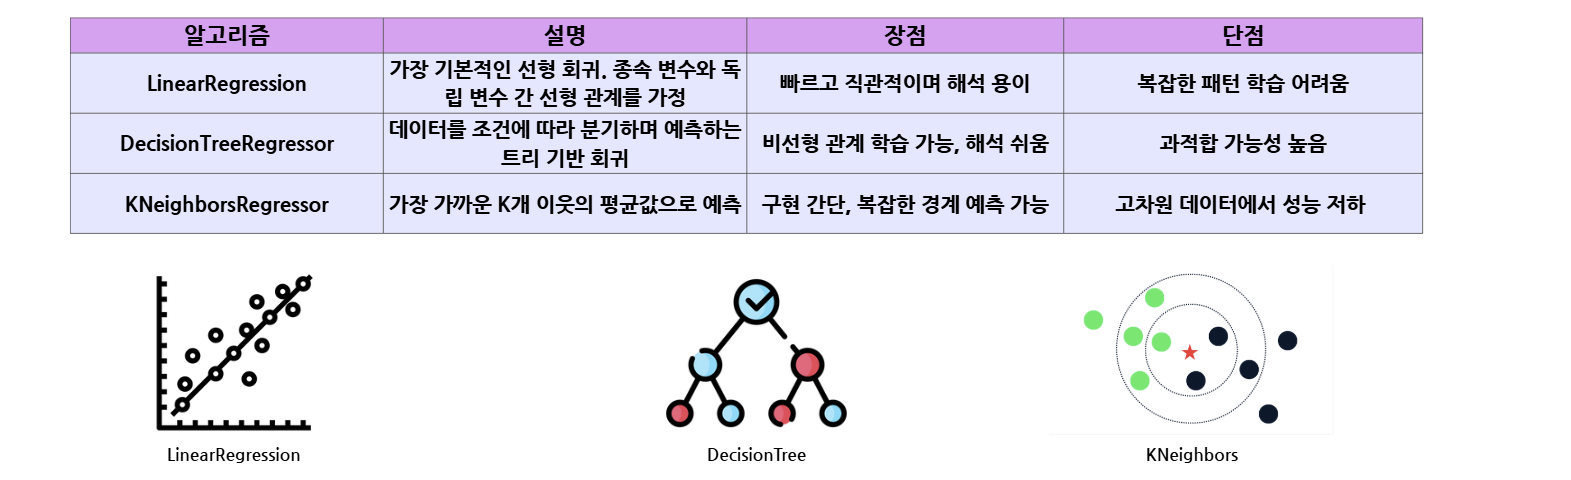

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 학습용 데이터 생성 (공부시간, 집중도 → 시험성적)
df = pd.DataFrame({
    'time': [8, 12, 14, 18, 21, 22, 17, 13, 15, 19],
    'focus': [0.5, 0.7, 0.6, 0.8, 0.9, 0.95, 0.85, 0.7, 0.75, 0.88],
    'score': [69, 82, 83, 91, 93, 98, 92, 87, 89, 94]
})


#feature, label 분리

X = df.drop('score',axis=1)
y = df['score']

#훈련/검증 데이터 분리
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [2]:
#사이킷런 라이브러리 코드
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("예측:",y_pred_lr)

dt = DecisionTreeRegressor(random_state=43)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("예측:",y_pred_dt)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("예측:",y_pred_knn)


print("실제:",y_test.values)


예측: [86.5723915  82.63142758 98.65104956]
예측: [87. 87. 93.]
예측: [89.4 84.4 90.6]
실제: [89 82 98]


> - 위의 알고리즘들은 각기 다른 계열의 모델로, AICE 시험에서는 직접 타이핑해야 합니다.
> - '어떤 계열의 모델인지', '라이브러리 임포트 경로와 스펠링'을 정확히 기억해두는 것이 중요합니다.
> - 예) 선형계열은 linear_model, 트리계열은 tree, 앙상블은 ensemble, 이웃기반은 neighbors

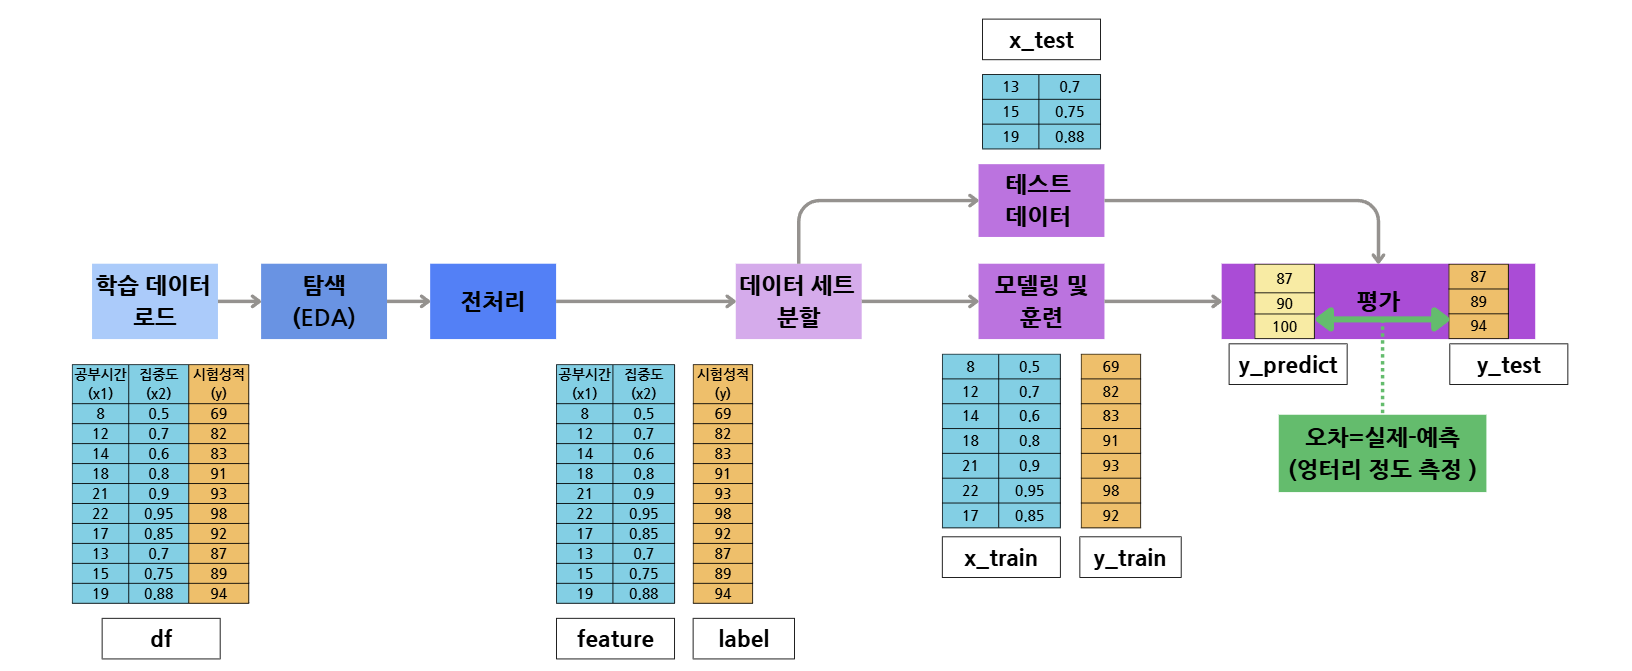

---

## 📏 **회귀 모델의 평가 지표**

- 회귀 모델의 성능은 아래의 지표를 통해 판단합니다.
- 각 지표의 수치를 올바르게 해석해야 **적합한 알고리즘**과 **좋은 모델**을 선택할 수 있습니다.


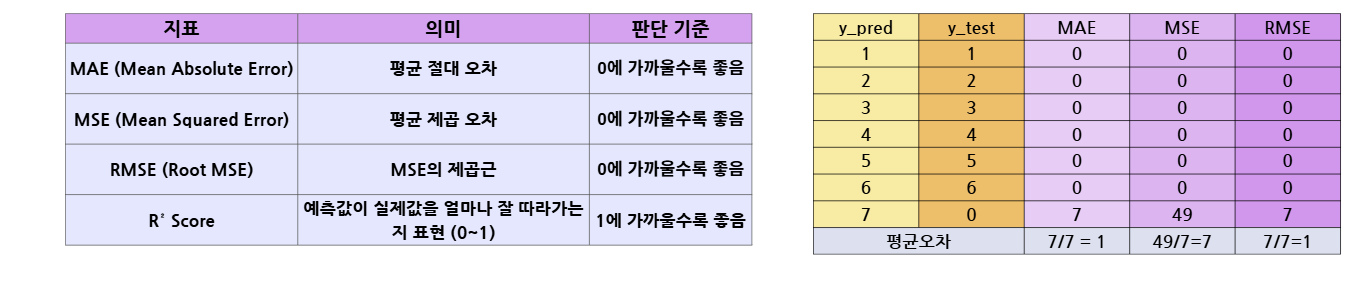

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 예측 결과와 실제 값 (예시)
y_test = [87, 89, 94]
y_pred = [87, 90, 100]

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)     # → (0 + 1 + 6)/3 = 2.33
mse = mean_squared_error(y_test, y_pred)      # → (0² + 1² + 6²)/3 = 12.33
rmse = np.sqrt(mse)                           # → sqrt(12.33) ≈ 3.51
r2 = r2_score(y_test, y_pred)                 # R² = 1 - (SSE / SST)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2.3333333333333335
MSE: 12.333333333333334
RMSE: 3.5118845842842465
R²: -0.42307692307692313


## **베스트 알고리즘 선별**

In [4]:
print("[LR]","MSE:", mean_squared_error(y_test, y_pred_lr), "R2:", r2_score(y_test, y_pred_lr))
print("[DT]","MSE:", mean_squared_error(y_test, y_pred_dt), "R2:", r2_score(y_test, y_pred_dt))
print("[KNN]","MSE:", mean_squared_error(y_test, y_pred_knn), "R2:", r2_score(y_test, y_pred_knn))

[LR] MSE: 20.791275243978948 R2: -1.3989932973821864
[DT] MSE: 1.6666666666666667 R2: 0.8076923076923077
[KNN] MSE: 12.82666666666667 R2: -0.4800000000000004


> **가장 베스트 알고리즘은?**
> - DecisionTree
> - 에러계열인 MSE는 0에 가깝고,
> - 예측값이 실제값에 가장 잘 따라가는지 측정하는 R2는 1에 가깝기 때문에 DecisionTree이 가장 베스트 알고리즘이다.

---

## **변수 중요도 확인: only DT**
- tree계열의 알고리즘은 변수 중요도를 확인할 수 있습니다.
- 예측에 얼마나 기여했는지 정량적으로 판단할 수 있으며, 해석과 변수 선택에 유용합니다.


In [6]:
# 변수 영향도
print("DT",dt.feature_importances_)

DT [0.9806867 0.0193133]


<Axes: xlabel='importance', ylabel='feature'>

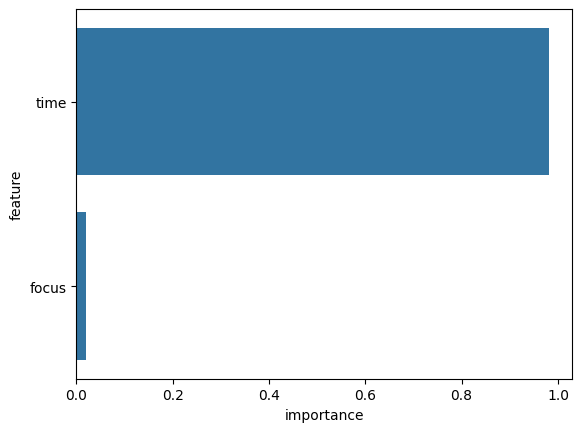

In [7]:
import_df = pd.DataFrame({"importance":dt.feature_importances_,"feature":x_train.columns}).sort_values(by="importance",ascending=False)

import seaborn as sns
sns.barplot(y="feature",x="importance",data=import_df)

>  DT알고리즘에 의하면 시험 점수를 예측하는데 있어 `시간` 변수가 절대적으로 중요한 변수라고 볼 수 있다.

>

---

## **연습 문제**
### **중고차 가격 예측**

**[데이터 설명: car_basic_info.csv]**
- car_id	차량 고유 식별자 (primary key)
- brand	제조사 브랜드 이름 (예: Hyundai, Kia, BMW 등)
- model	차량 모델명 (예: Avante, Sorento 등)
- year	출고 연도 (숫자형, 예: 2017, 2019 등)
- fuel_type	연료 종류 (범주형: Gasoline, Diesel 등)
- transmission	변속기 종류 (범주형: Automatic, Manual 등)
- engine_size	배기량 (리터 단위, 예: 1.6, 2.0 등, 결측치 존재)
- **price: 차량 판매 가격 (예측 대상, 단위: 만원)**

**[데이터 설명: car_history_info.csv]**
- car_id	차량 고유 식별자 (basic_info와 병합용 키)
- mileage	누적 주행 거리 (단위: km)
- option_count	차량 장착 옵션 개수 (숫자형, 결측치 존재)
- repair_count	정비 이력의 총 횟수
- repair_cost	누적 정비 비용 (단위: 만 원, 일부 결측치 존재)
- last_repair_date	마지막 정비 일자 (예: 2022-11-05, 분석에는 사용되지 않음)

### **문제 1. 데이터를 아래의 지시대로 로드하고, 문제 유형을 변수`답안01`에 저장하시오.**

- 아래 두 파일을 불러오고 car_id 기준으로 병합하여 하나의 데이터프레임 df를 만드시오.
    - car_basic_info.csv
    - car_history_info.csv

- 조건:
    - 병합 키: 'car_id'
    - 병합 방식: 기본(inner join)

- 답안01='회귀' 또는 답안01='분류'



In [ ]:
# 여기에 코드를 작성하세요.
import pandas as pd

df_basic = pd.read_csv('car_basic_info.csv')
df_history = pd.read_csv('car_history_info.csv')

In [8]:
import pandas as pd

df_basic = pd.read_csv('car_basic_info.csv')
df_history = pd.read_csv('car_history_info.csv')
df = pd.merge(df_basic, df_history, on='car_id')
df.head()
답안01='회귀'

### **문제 2. 아래의 전처리 코드를 실행시키고, 컬럼 개수를 `답안02`에 저장하시오.**

In [10]:
# 전처리 코드를 먼저 실행하세요.
copy_df = df.copy()

copy_df.dropna(inplace=True) #결측치 삭제

encode_df = pd.get_dummies(copy_df,drop_first=True,dtype=int) #인코딩

In [ ]:
# 여기에 코드를 작성하세요.

In [11]:
copy_df = df.copy()

copy_df.dropna(inplace=True)

encode_df = pd.get_dummies(copy_df,drop_first=True,dtype=int)

답안02=encode_df.shape[1]

### **문제 3.  변수 X,y 데이터로 분리하시오**
- `encode_df` 사용
- 타겟 변수: price
- 설명 변수: 나머지 전체 컬럼

In [ ]:
# 여기에 코드를 작성하세요.

In [12]:
X = encode_df.drop('price', axis=1)
y = encode_df['price']
X.shape,y.shape

((5608, 13), (5608,))

### **문제 4.  학습/검증 데이터로 분할하시오.**
- 훈련:검증 = 8:2
- random_state = 42
- train_test_split 사용
- 결과는 다음 변수에 저장할 것:X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
# 여기에 코드를 작성하세요.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **문제 5. 다음 조건으로 모델을 학습하시오.**

- LinearRegression
    - 기본값
- Decision Tree
    - random_state = 42



- 각 모델을 학습하고 다음 변수에 저장하시오:
    - dt : 결정트리 모델
    - lr : 선형회귀 모델

In [ ]:
# 여기에 코드를 작성하세요.

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

dt = DecisionTreeRegressor(random_state=42)
lr = LinearRegression()

dt.fit(X_train, y_train)
lr.fit(X_train, y_train)


LinearRegression()

### **문제 6. 검증 데이터를 활용하여 두 모델의 예측값을 구하고, 성능을 RMSE 기준으로 비교하시오.**

- mean_squared_error 함수 사용
- np.sqrt()로 RMSE 계산
- 예측 결과를 각각 y_pred_dt, y_pred_lr에 저장
- RMSE는 rmse_dt, rmse_lr에 저장
- RMSE가 더 낮은 모델명을 `답안06` 변수에 문자열로 저장하시오.
(예: 'decisiontree' 또는 'linearregression')

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# 여기에 코드를 작성하세요.

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"LinearRegression RMSE: {rmse_lr:.2f}")

답안06 = 'linearregression' if rmse_lr < rmse_dt else 'decisiontree'
print("더 좋은 모델:", 답안06)


Decision Tree RMSE: 233.90
LinearRegression RMSE: 150.93
더 좋은 모델: linearregression
